<a href="https://colab.research.google.com/github/ivnattt/Bank_Personal_Loan/blob/master/Bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None #To ignore a warning that popped up after reading xlxs file
import numpy as np

*To upload file from PC:*



In [2]:
from google.colab import files
uploaded = files.upload()

Saving Bank_Personal_Loan_Modelling.xlsx to Bank_Personal_Loan_Modelling.xlsx


In [3]:
import io

xls = pd.ExcelFile(io.BytesIO(uploaded['Bank_Personal_Loan_Modelling.xlsx']))
df1 = pd.read_excel(xls, 'Data')

In [4]:
df1.head(2)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0


Correlation of Everything with Everything :

In [5]:
df1[['Age', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage',     #Highlighing correlation of Personal Loan with other attributes
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard']].corr().style.apply(lambda x: ['background: lightblue' 
        if x.name == 'Personal Loan'  else '' for i in x])

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,-0.055269,-0.029216,-0.046418,-0.052030,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Income,-0.055269,1.000000,-0.016410,-0.157501,0.645993,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,-0.029216,-0.016410,1.000000,0.011778,-0.004068,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.046418,-0.157501,0.011778,1.000000,-0.109285,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052030,0.645993,-0.004068,-0.109285,1.000000,-0.136138,0.109909,0.366891,0.015087,0.136537,-0.003620,-0.006686
Education,0.041334,-0.187524,-0.017377,0.064929,-0.136138,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,0.206806,0.007383,-0.020445,0.109909,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,0.502462,0.000107,0.061367,0.366891,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.002616,0.004704,0.019994,0.015087,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.169738,0.019972,0.014110,0.136537,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


What's worth observing is that Age and Experience are highly correlated.
Also, Income and CCAvg are moderately correlated.

# EDA  / UNIQUE VALUES with inferences


Personal Loan

In [6]:
output = df1.drop_duplicates()
output.groupby('Personal Loan').size()

Personal Loan
0    4520
1     480
dtype: int64

ZIP Code Values

=> There are 467 unique vales

=> Also it's correlation with Personal Loan is negative

=> It is seemingly redundant

In [7]:
out = df1.drop_duplicates()
out.groupby('ZIP Code').size()

ZIP Code
9307     1
90005    5
90007    6
90009    8
90011    3
        ..
96091    4
96094    2
96145    1
96150    4
96651    6
Length: 467, dtype: int64

Credit Card spending

=> Number of people with zero credit card spending per month = 106/5000  

In [8]:
out = df1.drop_duplicates()
out.groupby('CCAvg').size()

CCAvg
0.0     106
0.1     183
0.2     204
0.3     241
0.4     179
       ... 
8.8       9
8.9       1
9.0       2
9.3       1
10.0      3
Length: 108, dtype: int64

Mortage Values

=> Number of people with zero mortgage= 3462

In [9]:
out = df1.drop_duplicates()
out.groupby('Mortgage').size()

Mortgage
0      3462
75        8
76       12
77        4
78       15
       ... 
590       1
601       1
612       1
617       1
635       1
Length: 347, dtype: int64

# Visualisation (Part of EDA) - Only Observations

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas.util.testing as tm
import seaborn as sns
sns.set(style="dark") #to make the graph look cleaner

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


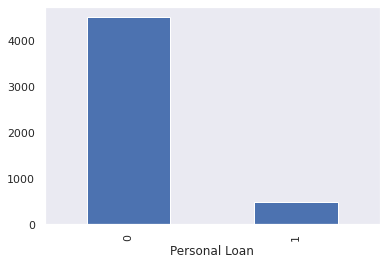

In [11]:
out = df1.drop_duplicates()
out.groupby('Personal Loan').size().plot(kind="bar")

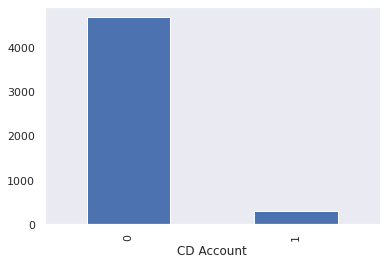

In [12]:
out = df1.drop_duplicates()
out.groupby('CD Account').size().plot(kind="bar")

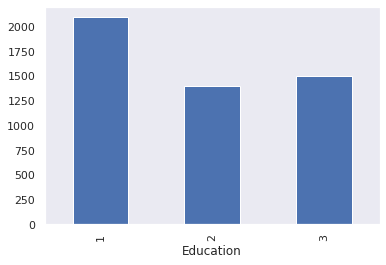

In [13]:
out = df1.drop_duplicates()
out.groupby('Education').size().plot(kind="bar")

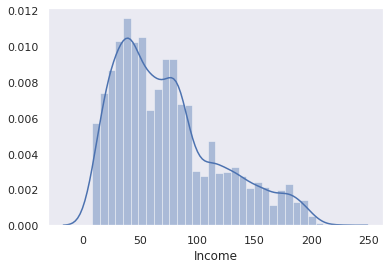

In [14]:
sns.distplot(df1['Income'])

The income data is skewed and needs to be normalized.

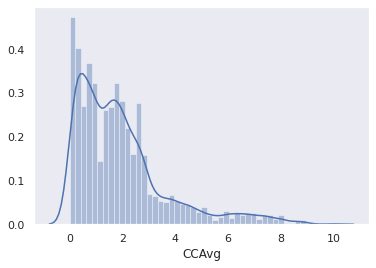

In [15]:
sns.distplot(df1['CCAvg'])

Just like income, CCAvg is unevenly distributed and is heavily skewed.

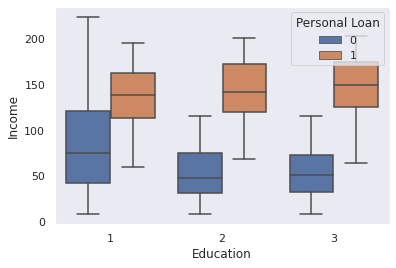

In [16]:
sns.boxplot(x="Education", y="Income", hue="Personal Loan", data=df1)

=> People with higher income in all levels of education take up a loan.

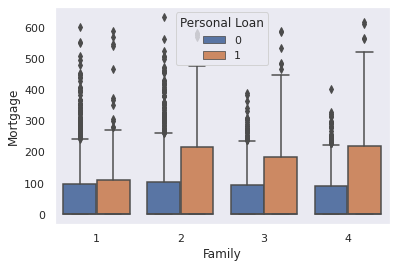

In [17]:
sns.boxplot(x="Family", y="Mortgage", hue="Personal Loan" ,data=df1)

The data has a lot of outliers and is heavily skewed (positively).

=> For people with level 1 education, there's equal tendency towards taking a loan.

=> For people with level 2 and 3 education, higher mortgage suggests higher chances at taking a loan.

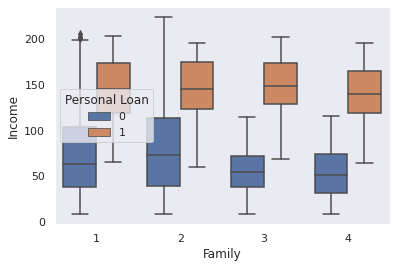

In [18]:
sns.boxplot(x="Family",y="Income",hue="Personal Loan", data=df1)

=> Families having low income, tend to not take personal loan.

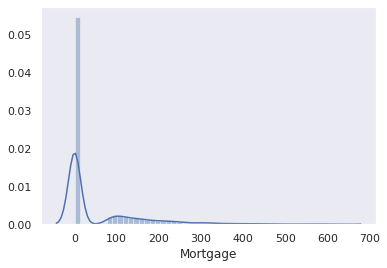

In [19]:
sns.distplot(df1['Mortgage'])
plt.show()

=> Mortgage data is skewed and unevenly distributed.

# Data Analysis and Cleaning 



In [20]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer

In [21]:

df1.shape

(5000, 14)

In [22]:
df1.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


*Some entries for experience are negative. Unacceptable.*

*Experince goes hand in hand with experince. A correlation value gives us a fair idea of how distinctive the features are.*

*Age and Experience are **highly** correlated. So we can do away with one of them Experience has some negative values, so we'll delete the column of experience .*

The ID and is also a redundant. So we'll remove that. 

In [23]:
del df1['ID']
del df1['Experience']

In [24]:
df1.head(1)

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0


In [25]:
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Age                     20.0
Income                  59.0
ZIP Code              2697.0
Family                   2.0
CCAvg                    1.8
Education                2.0
Mortgage               101.0
Personal Loan            0.0
Securities Account       0.0
CD Account               0.0
Online                   1.0
CreditCard               1.0
dtype: float64


Mortgage is thus expectedly carrying outliers.

In [26]:
#To deal with outliers in Mortgage, I chose binning
bins=[0,100,200,300,400,500,600,700]
group=[0,1,2,3,4,5,6]
df1['Mortgage']=pd.cut(df1['Mortgage'].fillna(0), bins, labels=group,  include_lowest=True)

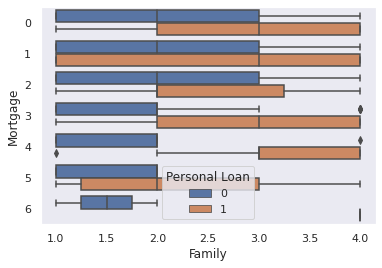

In [27]:
sns.boxplot(x="Family", y="Mortgage", hue="Personal Loan" ,data=df1)

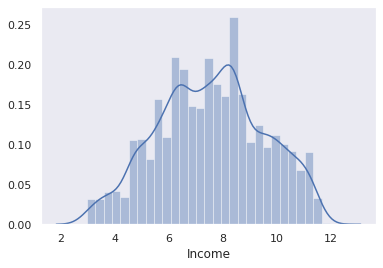

In [28]:
new_income = PowerTransformer(method="yeo-johnson", standardize=False)

new_income.fit(df1["Income"].values.reshape(-1, 1))

df1["Income"] = new_income.transform(df1["Income"].values.reshape(-1, 1))

sns.distplot(df1["Income"])

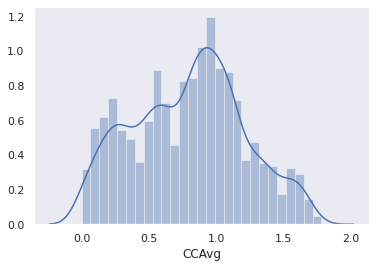

In [29]:
new_CCAvg = PowerTransformer(method="yeo-johnson", standardize=False)

new_CCAvg.fit(df1["CCAvg"].values.reshape(-1, 1))

df1["CCAvg"] = new_CCAvg.transform(df1["CCAvg"].values.reshape(-1, 1))

sns.distplot(df1["CCAvg"])

In [30]:
num_cols = ['Age', 'CCAvg', 'Income', 'Family', 'Education']
df1[num_cols]=(df1[num_cols]-df1[num_cols].min())/(df1[num_cols].max()-df1[num_cols].min())

# Train-Test Split

In [31]:
from sklearn.model_selection import train_test_split
df11=df1.loc[:, df1.columns != 'ZIP Code'] #to not affect the original data and also drop ZIP Code
df2=df11.pop('Personal Loan') #separating target variable
train_X, test_X, train_Y, test_Y= train_test_split(df11, df2, test_size=0.3, stratify=df2, random_state=0) #for equal distribution

In [32]:
train_Y.value_counts()/len(train_Y)

0    0.904
1    0.096
Name: Personal Loan, dtype: float64

In [33]:
test_Y.value_counts()/len(test_Y)

0    0.904
1    0.096
Name: Personal Loan, dtype: float64

In [34]:
train_X.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
3789,0.636364,0.231652,0.666667,0.180954,0.0,0,0,0,1,1
758,0.931818,0.330569,0.000000,0.457638,0.5,0,1,0,0,0
2868,0.659091,0.297577,1.000000,0.506971,0.0,0,0,0,1,1
2550,0.204545,0.187597,0.000000,0.216125,1.0,1,0,0,1,0
2150,0.886364,0.458088,0.000000,0.306062,0.0,0,1,0,0,1


# Decision Tree (Training score = 98.45% and Testing score=98.00%)

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
clf=DecisionTreeClassifier(criterion='gini', max_depth=4) #at max depth=3 testing accuracy is more tha training accuracy

In [37]:
clf.fit(train_X, train_Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [38]:
clf.score(train_X, train_Y)

0.9845714285714285

In [39]:
clf.score(test_X, test_Y)

0.98

# KNN (Training score = 92.94% and Testing score=92.80%)

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
k=KNeighborsClassifier(n_neighbors=21, weights='uniform')

In [42]:
k.fit(train_X, train_Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=21, p=2,
                     weights='uniform')

In [43]:
k.score(train_X, train_Y)

0.9294285714285714

In [44]:
k.score(test_X, test_Y)

0.928

# Logistic Regression (Training score = 95.31% and Testing score=95.46%)



In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
lr=LogisticRegression(max_iter=34)

In [47]:
lr.fit(train_X, train_Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=34,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
lr.score(train_X, train_Y)

0.9531428571428572

In [49]:
lr.score(test_X, test_Y)

0.9546666666666667

#Random Forest (Training score = 96.02% and Testing score=96.20%)

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
rf=RandomForestClassifier(max_depth=3, random_state=0)

In [52]:
rf.fit(train_X, train_Y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [53]:
rf.score(train_X, train_Y)

0.9602857142857143

In [54]:
rf.score(test_X, test_Y)

0.962

# Conclusion

The objective here of the bank was to identify potential takers of a personal loan based on customer's demographic information and their past activity with the bank.

We have built a model for the same purpose using a variety of information. 4 algorithms have been used in this notebook.

The respective results are:


1.   Decision Tree (Training score = 98.45% and Testing score=98.00%)
2.   KNN (Training score = 92.94% and Testing score=92.80%)
3.   Logistic Regression (Training score = 95.31% and Testing score=95.46%)
4.   Random Forest (Training score = 96.02% and Testing score=96.20%)

From the results, decision tree has the highest accuracy and it should therefore be the final model.






